In [ ]:
import pandas as pd
import numpy as np
from itertools import product
import time
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/pranav_medikonduru/Downloads/diabetes.csv")

In [3]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
for col in data.columns:
    print(col, sorted(data[col].unique())[:10])


Diabetes_012 [0.0, 1.0, 2.0]
HighBP [0.0, 1.0]
HighChol [0.0, 1.0]
CholCheck [0.0, 1.0]
BMI [12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0]
Smoker [0.0, 1.0]
Stroke [0.0, 1.0]
HeartDiseaseorAttack [0.0, 1.0]
PhysActivity [0.0, 1.0]
Fruits [0.0, 1.0]
Veggies [0.0, 1.0]
HvyAlcoholConsump [0.0, 1.0]
AnyHealthcare [0.0, 1.0]
NoDocbcCost [0.0, 1.0]
GenHlth [1.0, 2.0, 3.0, 4.0, 5.0]
MentHlth [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
PhysHlth [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
DiffWalk [0.0, 1.0]
Sex [0.0, 1.0]
Age [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Education [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
Income [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


In [7]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [29]:
bn_data = data.copy()
bn_data = bn_data[["Diabetes_012", "HighBP", "HighChol", "BMI", "Smoker", "PhysActivity", "HeartDiseaseorAttack", "Age", "Stroke"]]


In [30]:
bn_data["BMI"].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

In [31]:
# Bin BMI into normal/overweight/obese categories
bn_data.loc[:, "BMI"] = pd.cut(
    bn_data["BMI"],
    bins=[-1, 25, 30, float("inf")],
    labels=[0, 1, 2]
).astype(int)


In [32]:
bn_data.describe()
for col in bn_data.columns:
    print(col, sorted(bn_data[col].unique()))


Diabetes_012 [0.0, 1.0, 2.0]
HighBP [0.0, 1.0]
HighChol [0.0, 1.0]
BMI [0.0, 1.0, 2.0]
Smoker [0.0, 1.0]
PhysActivity [0.0, 1.0]
HeartDiseaseorAttack [0.0, 1.0]
Age [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
Stroke [0.0, 1.0]


In [33]:
# Bayesian network structure
nodes = [
    "Age",
    "Smoker",
    "PhysActivity",
    "BMI",
    "HighChol",
    "HighBP",
    "Diabetes_012",
    "HeartDiseaseorAttack",
    "Stroke",
]

parents = {
    "Age": [],
    "Smoker": [],
    "PhysActivity": [],
    "BMI": ["PhysActivity"],
    "HighChol": ["Smoker", "Age"],
    "HighBP": ["HighChol", "BMI", "Age"],
    "Diabetes_012": ["HighBP", "HighChol", "BMI", "Age"],
    "HeartDiseaseorAttack": ["Diabetes_012", "Age"],
    "Stroke": ["Diabetes_012", "Smoker", "Age"],
}

topo_order = [
    "Age",
    "Smoker",
    "PhysActivity",
    "BMI",
    "HighChol",
    "HighBP",
    "Diabetes_012",
    "HeartDiseaseorAttack",
    "Stroke",
]

state_names = {
    var: sorted(bn_data[var].unique())
    for var in nodes
}

for var in nodes:
    print(var, "->", state_names[var])


Age -> [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
Smoker -> [0.0, 1.0]
PhysActivity -> [0.0, 1.0]
BMI -> [0.0, 1.0, 2.0]
HighChol -> [0.0, 1.0]
HighBP -> [0.0, 1.0]
Diabetes_012 -> [0.0, 1.0, 2.0]
HeartDiseaseorAttack -> [0.0, 1.0]
Stroke -> [0.0, 1.0]


In [34]:

def learn_cpt(df, child, parents, state_names, alpha=1.0):
    """
    Learn CPT: P(child | parents) using Laplace smoothing.
    Returns a DataFrame with columns: parents + [child] + ['prob'].
    """
    child_states = state_names[child]
    
    if len(parents) == 0:
        counts = df[child].value_counts().reindex(child_states, fill_value=0)
        counts = counts + alpha
        probs = counts / counts.sum()
        out = probs.reset_index()
        out.columns = [child, "prob"]
        return out
    
    parent_states = [state_names[p] for p in parents]
    combos = list(product(*parent_states, child_states))
    
    full = []
    for combo in combos:
        full.append(dict(zip(parents + [child], combo)))
    full = pd.DataFrame(full)

    counts = (
        df.groupby(parents + [child])
          .size()
          .reset_index(name="count")
    )

    full = full.merge(counts, on=parents + [child], how="left").fillna({"count": 0})
    full["count"] = full["count"] + alpha
    full["prob"] = full.groupby(parents)["count"].transform(lambda x: x / x.sum())
    
    return full.drop(columns=["count"])


In [35]:
cpts = {}

for child in nodes:
    cpts[child] = learn_cpt(
        df=bn_data,
        child=child,
        parents=parents[child],
        state_names=state_names
    )


In [36]:
cpts["Diabetes_012"].head()

,HighBP,HighChol,BMI,Age,Diabetes_012,prob
0,0.0,0.0,0.0,1.0,0.0,0.991921
1,0.0,0.0,0.0,1.0,1.0,0.001756
2,0.0,0.0,0.0,1.0,2.0,0.006322
3,0.0,0.0,0.0,2.0,0.0,0.988467
4,0.0,0.0,0.0,2.0,1.0,0.003392


In [37]:
class Factor:
    """Container for factor variables, probability table, and state names."""
    def __init__(self, vars, table, state_names):
        self.vars = vars
        self.table = table
        self.state_names = state_names
    
    def copy(self):
        return Factor(list(self.vars), self.table.copy(), self.state_names)


In [38]:

def restrict_factor(factor: pd.DataFrame, var, value):
    """
    Condition factor on var = value.
    Returns a new factor with the same columns, fewer rows.
    """
    if var not in factor.columns:
        return factor.copy()
    return factor[factor[var] == value].copy()


def multiply_factors(f1: pd.DataFrame, f2: pd.DataFrame):
    """Multiply two factors (joining on any shared variables)."""
    vars1 = [c for c in f1.columns if c != "prob"]
    vars2 = [c for c in f2.columns if c != "prob"]
    
    common = list(set(vars1) & set(vars2))
    
    if not common:
        merged = f1.assign(key=1).merge(f2.assign(key=1), on="key").drop(columns="key")
    else:
        merged = f1.merge(f2, on=common)
    
    merged["prob"] = merged["prob_x"] * merged["prob_y"]
    merged = merged.drop(columns=["prob_x", "prob_y"])
    
    return merged


def sum_out_factor(factor: pd.DataFrame, var):
    """Marginalize (sum out) 'var' from factor."""
    if var not in factor.columns:
        return factor.copy()
    
    remaining = [c for c in factor.columns if c not in [var, "prob"]]
    
    summed = (
        factor
        .groupby(remaining, as_index=False)["prob"]
        .sum()
    )
    return summed


In [39]:
def variable_elimination(
    query_var,
    evidence: dict,
    nodes,
    parents,
    cpts,
    elimination_order=None,
):
    """
    Compute P(query_var | evidence) using variable elimination over CPT factors.
    
    evidence: dict like {'BMI': 2.0, 'PhysActivity': 0.0}
    Returns: pandas Series indexed by query_var values with normalized probabilities.
    """
    factors = [cpts[var].copy() for var in nodes]
    
    for ev_var, ev_val in evidence.items():
        factors = [restrict_factor(f, ev_var, ev_val) for f in factors]
    
    hidden_vars = [v for v in nodes if v not in evidence and v != query_var]
    
    if elimination_order is None:
        elimination_order = hidden_vars
    else:
        elimination_order = [v for v in elimination_order if v in hidden_vars]
    
    for Z in elimination_order:
        involved = [f for f in factors if Z in f.columns]
        if not involved:
            continue
        
        factors = [f for f in factors if Z not in f.columns]
        
        combined = involved[0]
        for f in involved[1:]:
            combined = multiply_factors(combined, f)
        
        reduced = sum_out_factor(combined, Z)
        factors.append(reduced)
    
    if not factors:
        raise ValueError("No factors left after elimination.")
    
    joint = factors[0]
    for f in factors[1:]:
        joint = multiply_factors(joint, f)
    
    other_vars = [c for c in joint.columns if c not in [query_var, "prob"]]
    for ov in other_vars:
        joint = sum_out_factor(joint, ov)
    
    total = joint["prob"].sum()
    joint["prob"] = joint["prob"] / total
    
    result = joint.set_index(query_var)["prob"].sort_index()
    return result


In [40]:
# Scenario: obese, inactive, high cholesterol, middle age group
evidence = {
    "BMI": 2.0,
    "PhysActivity": 0.0,
    "HighChol": 1.0,
    "Age": 9.0,
}

res = variable_elimination(
    query_var="Diabetes_012",
    evidence=evidence,
    nodes=nodes,
    parents=parents,
    cpts=cpts,
    elimination_order=nodes,
)

print(res)


Diabetes_012
0.0    0.583224
1.0    0.038507
2.0    0.378269
Name: prob, dtype: float64


In [41]:

def get_conditional_probs(var, assignment, parents, cpts, state_names):
    """
    Returns (states, probs) for P(var | parents=assignment[parents]).
    """
    cpt = cpts[var]
    df = cpt.copy()
    
    for p in parents:
        df = df[df[p] == assignment[p]]
    
    states = state_names[var]
    probs = []
    for s in states:
        row = df[df[var] == s]
        if row.empty:
            probs.append(0.0)
        else:
            probs.append(float(row["prob"].iloc[0]))
    probs = np.array(probs, dtype=float)
    
    total = probs.sum()
    if total == 0:
        probs = np.ones_like(probs) / len(probs)
    else:
        probs = probs / total

    return states, probs


In [42]:
def lw_sample_once(evidence, topo_order, parents, cpts, state_names):
    """Returns (sample_dict, weight) from one likelihood weighting run."""
    weight = 1.0
    sample = {}
    
    for var in topo_order:
        pa = parents[var]
        states, probs = get_conditional_probs(var, sample, pa, cpts, state_names)
        
        if var in evidence:
            ev_val = evidence[var]
            try:
                idx = states.index(ev_val)
            except ValueError:
                return sample, 0.0
            
            weight *= probs[idx]
            sample[var] = ev_val
        else:
            sample[var] = np.random.choice(states, p=probs)
    
    return sample, weight


In [43]:
def likelihood_weighting(query_var, evidence, N, topo_order, parents, cpts, state_names):
    """
    Approximate P(query_var | evidence) using likelihood weighting with N samples.
    Returns: pandas Series indexed by query_var states.
    """
    states = state_names[query_var]
    weights = np.zeros(len(states), dtype=float)
    
    for _ in range(N):
        sample, w = lw_sample_once(evidence, topo_order, parents, cpts, state_names)
        if w == 0.0:
            continue
        q_val = sample[query_var]
        idx = states.index(q_val)
        weights[idx] += w
    
    total = weights.sum()
    if total == 0:
        probs = np.ones_like(weights) / len(weights)
    else:
        probs = weights / total
    
    return pd.Series(probs, index=states)


In [44]:
# Compare exact VE and likelihood weighting on obesity/inactivity/high cholesterol evidence
evidence = {
    "BMI": 2.0,
    "PhysActivity": 0.0,
    "HighChol": 1.0,
    "Age": 9.0,
}

ve_res = variable_elimination(
    query_var="Diabetes_012",
    evidence=evidence,
    nodes=nodes,
    parents=parents,
    cpts=cpts,
    elimination_order=nodes,
)

print("Exact VE result:")
print(ve_res)

lw_res = likelihood_weighting(
    query_var="Diabetes_012",
    evidence=evidence,
    N=5000,
    topo_order=topo_order,
    parents=parents,
    cpts=cpts,
    state_names=state_names,
)

print("
LW (N=5000) result:")
print(lw_res)

abs_error = (ve_res - lw_res).abs()
print("
Absolute error per state:")
print(abs_error)
print("Total L1 error:", abs_error.sum())


Exact VE result:
Diabetes_012
0.0    0.583224
1.0    0.038507
2.0    0.378269
Name: prob, dtype: float64

LW (N=5000) result:
0.0    0.583531
1.0    0.036378
2.0    0.380092
dtype: float64

Absolute error per state:
Diabetes_012
0.0    0.000306
1.0    0.002129
2.0    0.001823
dtype: float64
Total L1 error: 0.004258708242691138


In [45]:
# Query setups used in experiments
queries = [
    {
        "name": "Obesity + Inactivity + HighChol",
        "query_var": "Diabetes_012",
        "evidence": {
            "BMI": 2.0,
            "PhysActivity": 0.0,
            "HighChol": 1.0,
            "Age": 9.0
        }
    },
    {
        "name": "Active Normal-Weight Adult",
        "query_var": "Diabetes_012",
        "evidence": {
            "BMI": 0.0,
            "PhysActivity": 1.0,
            "Age": 7.0
        }
    },
    {
        "name": "Smoker + HighChol",
        "query_var": "Diabetes_012",
        "evidence": {
            "Smoker": 1.0,
            "HighChol": 1.0,
            "Age": 8.0
        }
    },
    {
        "name": "Diabetes → HeartDisease risk",
        "query_var": "HeartDiseaseorAttack",
        "evidence": {
            "Diabetes_012": 2.0,
            "Age": 10.0
        }
    },
    {
        "name": "Diabetes → Stroke risk",
        "query_var": "Stroke",
        "evidence": {
            "Diabetes_012": 2.0,
            "Smoker": 1.0,
            "Age": 10.0
        }
    },
]


In [46]:
lw_sizes = [100, 500, 1000, 5000, 10000]

In [47]:

def run_experiments(queries, lw_sizes, nodes, parents, cpts, state_names, topo_order):
    results = []

    for q in queries:
        qname = q["name"]
        query_var = q["query_var"]
        evidence = q["evidence"]

        start = time.time()
        ve_res = variable_elimination(
            query_var=query_var,
            evidence=evidence,
            nodes=nodes,
            parents=parents,
            cpts=cpts,
            elimination_order=nodes,
        )
        ve_time = time.time() - start

        print(f"\n=== Query: {qname} ===")
        print("VE:", ve_res.to_dict(), "Time:", round(ve_time,4))

        for N in lw_sizes:
            start = time.time()
            lw_res = likelihood_weighting(
                query_var=query_var,
                evidence=evidence,
                N=N,
                topo_order=topo_order,
                parents=parents,
                cpts=cpts,
                state_names=state_names,
            )
            lw_time = time.time() - start

            lw_res = lw_res.reindex(ve_res.index, fill_value=0)
            abs_error = (lw_res - ve_res).abs().sum()

            print(f"LW N={N}:", lw_res.to_dict(), 
                  "| L1 error:", round(abs_error,4), 
                  "| Time:", round(lw_time,4))

            results.append({
                "query": qname,
                "query_var": query_var,
                "N": N,
                "ve_time": ve_time,
                "lw_time": lw_time,
                "l1_error": abs_error,
                "ve_result": ve_res.to_dict(),
                "lw_result": lw_res.to_dict(),
            })

    return pd.DataFrame(results)


In [48]:
results_df = run_experiments(
    queries, lw_sizes, nodes, parents, cpts, state_names, topo_order
)



=== Query: Obesity + Inactivity + HighChol ===
VE: {0.0: 0.5832243676889397, 1.0: 0.038507098605069394, 2.0: 0.37826853370599095} Time: 0.0712
LW N=100: {0.0: 0.6097998140303417, 1.0: 0.042758117804183066, 2.0: 0.3474420681654752} | L1 error: 0.0617 | Time: 1.8105
LW N=500: {0.0: 0.5751116643967941, 1.0: 0.04089186775272217, 2.0: 0.3839964678504838} | L1 error: 0.0162 | Time: 8.6592
LW N=1000: {0.0: 0.5557756934329939, 1.0: 0.03883323472255084, 2.0: 0.4053910718444552} | L1 error: 0.0549 | Time: 18.1329
LW N=5000: {0.0: 0.5805346334786919, 1.0: 0.04087062739865727, 2.0: 0.3785947391226508} | L1 error: 0.0054 | Time: 88.0206
LW N=10000: {0.0: 0.5910283982069167, 1.0: 0.0393387382927451, 2.0: 0.3696328635003382} | L1 error: 0.0173 | Time: 171.3085

=== Query: Active Normal-Weight Adult ===
VE: {0.0: 0.9360297177473015, 1.0: 0.01145773193121674, 2.0: 0.05251255032148173} Time: 0.0521
LW N=100: {0.0: 0.9200000000000002, 1.0: 0.0, 2.0: 0.0799999999999999} | L1 error: 0.055 | Time: 1.7217
L

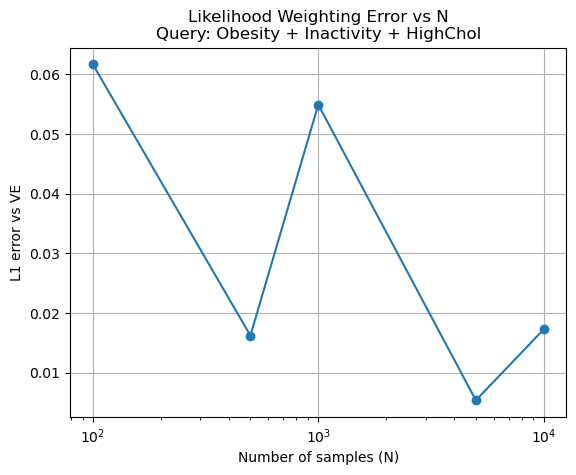

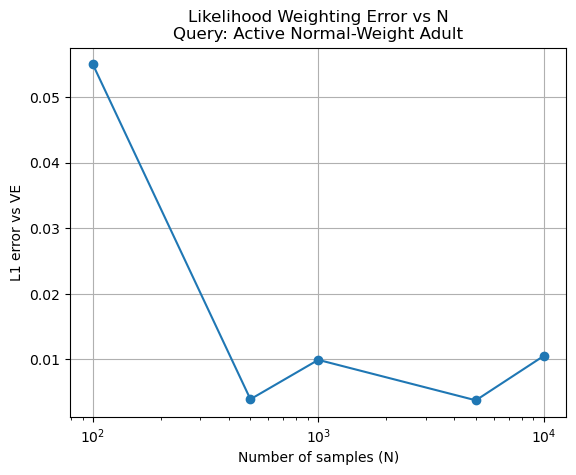

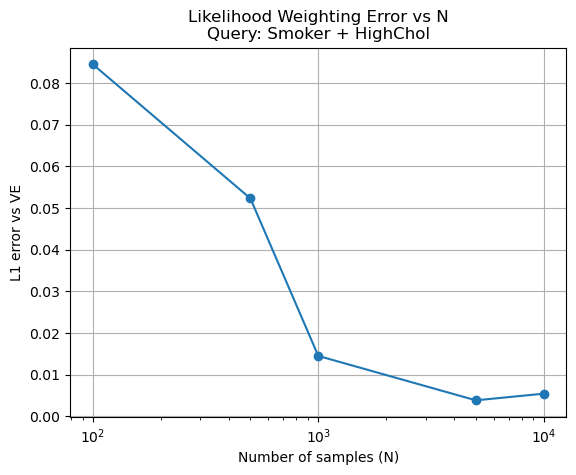

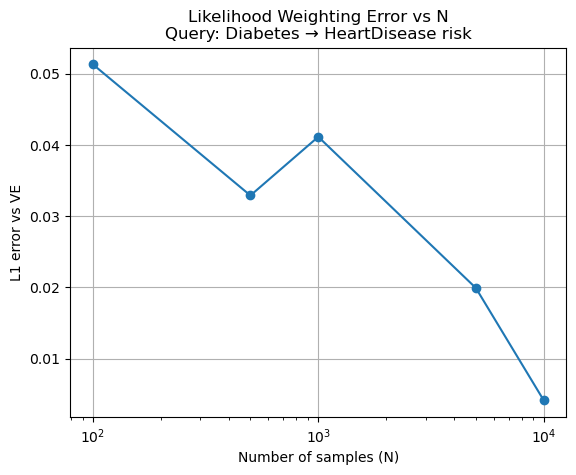

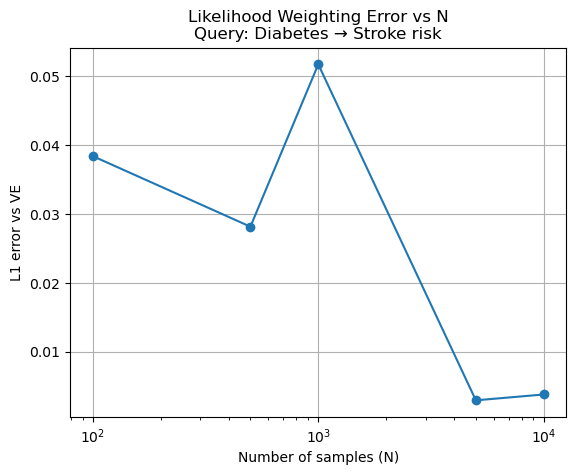

In [49]:

for qname in results_df["query"].unique():
    df_q = results_df[results_df["query"] == qname].sort_values("N")

    plt.figure()
    plt.plot(df_q["N"], df_q["l1_error"], marker="o")
    plt.xscale("log")
    plt.xlabel("Number of samples (N)")
    plt.ylabel("L1 error vs VE")
    plt.title(f"Likelihood Weighting Error vs N\nQuery: {qname}")
    plt.grid(True)
    plt.show()


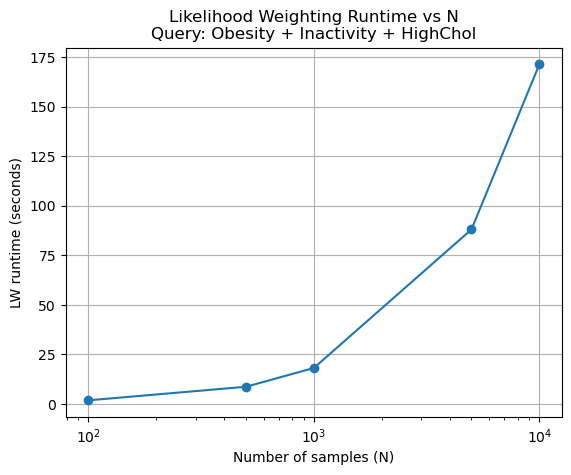

Query: Obesity + Inactivity + HighChol | Exact VE time ~ 0.0712 seconds


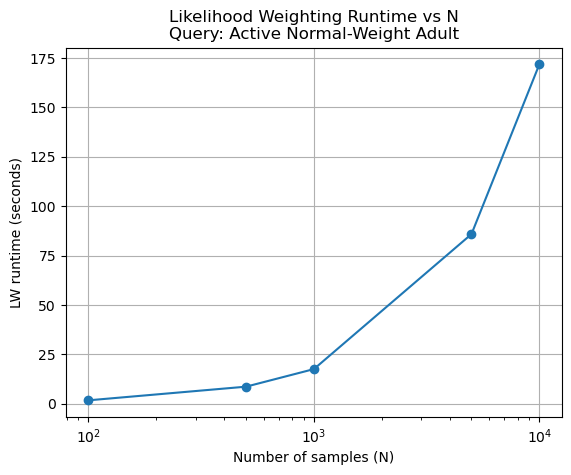

Query: Active Normal-Weight Adult | Exact VE time ~ 0.0521 seconds


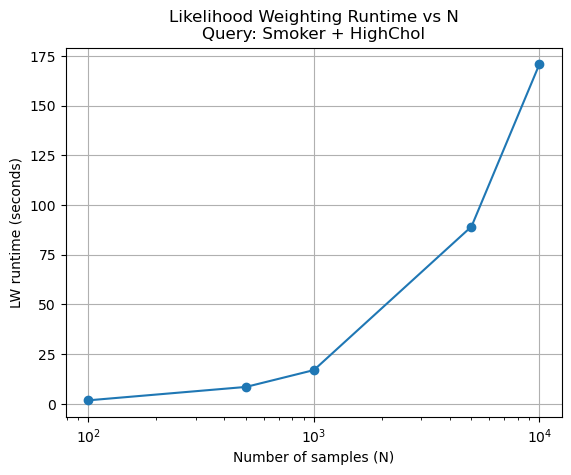

Query: Smoker + HighChol | Exact VE time ~ 0.0466 seconds


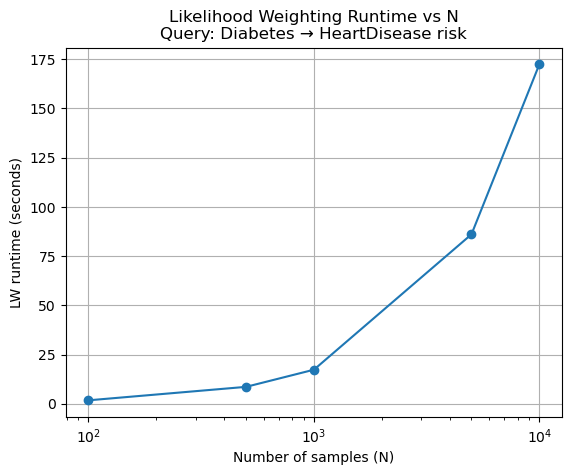

Query: Diabetes → HeartDisease risk | Exact VE time ~ 0.0474 seconds


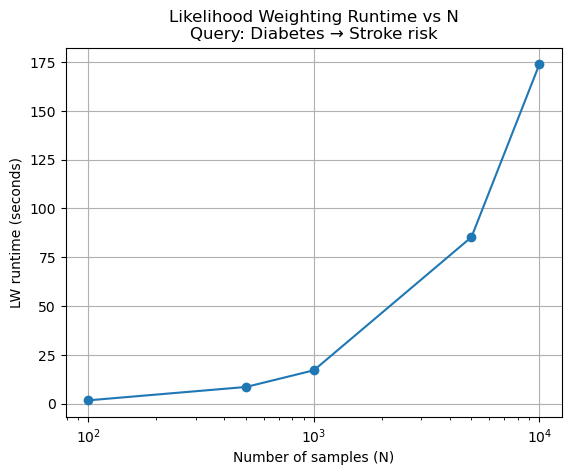

Query: Diabetes → Stroke risk | Exact VE time ~ 0.0479 seconds


In [50]:
for qname in results_df["query"].unique():
    df_q = results_df[results_df["query"] == qname].sort_values("N")

    plt.figure()
    plt.plot(df_q["N"], df_q["lw_time"], marker="o")
    plt.xscale("log")
    plt.xlabel("Number of samples (N)")
    plt.ylabel("LW runtime (seconds)")
    plt.title(f"Likelihood Weighting Runtime vs N\nQuery: {qname}")
    plt.grid(True)
    plt.show()

    ve_time_example = df_q["ve_time"].iloc[0]
    print(f"Query: {qname} | Exact VE time ~ {ve_time_example:.4f} seconds")


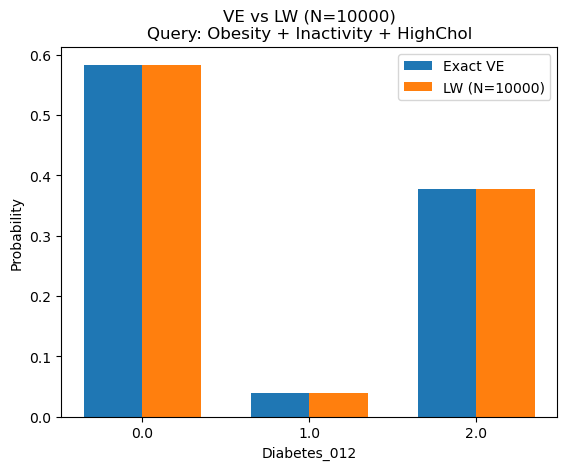

VE: {0.0: 0.5832243676889397, 1.0: 0.038507098605069394, 2.0: 0.37826853370599095}
LW (N=10000): {0.0: 0.5840320788652085, 1.0: 0.03905893223794164, 2.0: 0.37690898889684993}


In [51]:
# Compare VE and LW for a representative query
main_qname = "Obesity + Inactivity + HighChol"

q_info = [q for q in queries if q["name"] == main_qname][0]
ve_res = variable_elimination(
    query_var=q_info["query_var"],
    evidence=q_info["evidence"],
    nodes=nodes,
    parents=parents,
    cpts=cpts,
    elimination_order=nodes,
)

N_max = max(lw_sizes)
lw_res = likelihood_weighting(
    query_var=q_info["query_var"],
    evidence=q_info["evidence"],
    N=N_max,
    topo_order=topo_order,
    parents=parents,
    cpts=cpts,
    state_names=state_names,
)

lw_res = lw_res.reindex(ve_res.index, fill_value=0)

x = range(len(ve_res.index))
labels = [str(s) for s in ve_res.index]

plt.figure()
width = 0.35
plt.bar([i - width/2 for i in x], ve_res.values, width=width, label="Exact VE")
plt.bar([i + width/2 for i in x], lw_res.values, width=width, label=f"LW (N={N_max})")

plt.xticks(x, labels)
plt.xlabel(q_info["query_var"])
plt.ylabel("Probability")
plt.title(f"VE vs LW (N={N_max})\nQuery: {main_qname}")
plt.legend()
plt.show()

print("VE:", ve_res.to_dict())
print(f"LW (N={N_max}):", lw_res.to_dict())


In [52]:
avg_error_by_N = (
    results_df
    .groupby("N")["l1_error"]
    .mean()
    .reset_index()
)

print(avg_error_by_N)

       N  l1_error
0    100  0.058158
1    500  0.026696
2   1000  0.034432
3   5000  0.007164
4  10000  0.008233
